In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 38

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.35),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 256)               11008     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 38)                2

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, decay= 1e-6),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
history=model.fit(
    X_train,
    y_train,
    epochs=2000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/2000
146/147 [============================>.] - ETA: 0s - loss: 2.8427 - accuracy: 0.1615
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
147/147 [==============================] - 3s 13ms/step - loss: 2.8391 - accuracy: 0.1620 - val_loss: 1.8143 - val_accuracy: 0.4937
Epoch 2/2000
140/147 [===========================>..] - ETA: 0s - loss: 1.9012 - accuracy: 0.3713
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
147/147 [==============================] - 2s 11ms/step - loss: 1.8894 - accuracy: 0.3741 - val_loss: 1.1075 - val_accuracy: 0.7870
Epoch 3/2000
145/147 [============================>.] - ETA: 0s - loss: 1.5167 - accuracy: 0.4835
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
147/147 [==============================] - 1s 10ms/step - loss: 1.5165 - accuracy: 0.4839 - val_loss: 0.8363 - val_accuracy: 0.8024
Epoch 4/2000
146/147 [============================>.] - ETA: 0s - loss: 1.3272 - a

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

49/49 [==============================] - 0s 5ms/step - loss: 0.1829 - accuracy: 0.9335


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 283ms/step
[5.9243066e-05 8.3899271e-14 7.0209533e-10 3.2663850e-14 2.3687251e-05
 2.6034232e-04 2.2421238e-17 1.7605194e-08 3.9970498e-09 1.2421733e-10
 4.5757628e-14 9.0233852e-15 4.9850296e-08 1.0039713e-06 2.9205195e-05
 9.9923145e-09 9.1043555e-09 2.0346044e-17 5.6806625e-12 1.3367516e-07
 1.6481350e-13 2.3598240e-08 3.3394839e-30 9.4546659e-10 2.5444282e-20
 2.4864300e-09 1.1208910e-12 2.7738926e-07 1.9278611e-17 4.9870637e-16
 2.1843597e-07 5.2232292e-16 2.0777937e-14 1.3778103e-06 4.3219795e-21
 9.9962437e-01 1.2110448e-17 4.7823968e-18]
35


# Confusion matrix

196/196 [==============================] - 1s 2ms/step


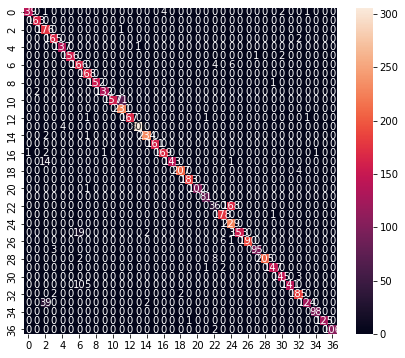

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       147
           1       0.99      1.00      0.99       163
           2       0.75      0.99      0.86       177
           3       0.97      0.99      0.98       167
           4       0.97      0.99      0.98       138
           5       1.00      0.98      0.99       159
           6       0.84      0.94      0.89       176
           7       0.95      1.00      0.98       168
           8       1.00      0.99      1.00       153
           9       0.99      0.99      0.99       134
          10       1.00      0.69      0.82       228
          11       0.76      1.00      0.87       231
          12       1.00      0.98      0.99       170
          13       1.00      0.99      0.99       310
          14       0.98      0.99      0.99       237
          15       1.00      1.00      1.00       161
          16       0.98      0.97      0.97       174
     

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpnpk9taz3\assets


58712

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[6.14175588e-05 7.42330324e-14 5.99597816e-10 2.29539864e-14
 1.97823447e-05 2.64713104e-04 1.51576943e-17 1.40622118e-08
 2.87409496e-09 1.22826360e-10 3.83535468e-14 5.74964440e-15
 4.54808209e-08 7.99594886e-07 2.46857289e-05 8.98012953e-09
 8.04852274e-09 1.70265931e-17 3.72511440e-12 1.11698206e-07
 9.61268012e-14 2.05429060e-08 1.09638490e-30 7.92614196e-10
 1.47222866e-20 1.76067638e-09 9.06047481e-13 2.25022632e-07
 1.16405314e-17 2.56521652e-16 2.40349948e-07 3.22483892e-16
 1.30848752e-14 1.50291100e-06 2.77973338e-21 9.99626398e-01
 5.75982115e-18 3.02716465e-18]
35


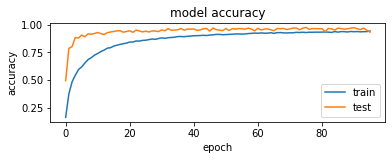

In [22]:
import matplotlib.pyplot as plot
plot.subplot(2,1,1)
plot.plot(history.history['accuracy'])
plot.plot(history.history['val_accuracy'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='lower right')


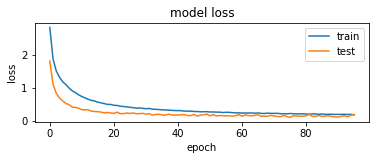

In [23]:
import matplotlib.pyplot as plot
plot.subplot(2,1,2)
plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.title('model loss')
plot.ylabel('loss')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='upper right')